## #Hello World - Machine Learning Recipes #1


In [0]:
from sklearn import tree
features = [[140, 1],[130, 1], [150, 0], [170, 0]]
labels = [["apple"] , ["apple"] , ["orange"] , ["orange"]]
#DecisionTreeClassifier 
clf = tree.DecisionTreeClassifier()
#Train 
clf = clf.fit(features, labels)
#Predict
print (clf.predict([[150, 0]]))

['orange']


## Visualizing a Decision Tree - Machine Learning Recipes #2

Import dataset and print

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

print (iris.feature_names) 
print (iris.target_names)
print (iris.data[0])
print (iris.target[0])
for i in range(len(iris.target)):
  print("Example %d: label %s, features %s" % (i, iris.target[i], iris.data[i]))

Training a classifier and testing predictions


In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
test_idx = [0,50,100]

#training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

#testing data 
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

print (test_target)
print (clf.predict(test_data))


#visualization
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, impurity=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("iris.pdf")

[0 1 2]
[0 1 2]


Visualization

In [0]:
!ls

iris  iris.pdf	sample_data


In [0]:
print (test_data[0], test_target[0])

print (iris.feature_names, iris.target_names)

[5.1 3.5 1.4 0.2] 0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


## What Makes a Good Feature? - Machine Learning Recipes #3

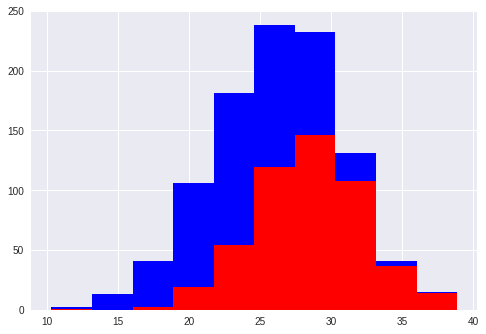

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

greyhounds = 500
labs = 500

grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

plt.hist([grey_height, lab_height], stacked=True, color=['r', 'b'])

plt.show()

## Let’s Write a Pipeline - Machine Learning Recipes #4


In [43]:
#import a dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
Y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = .5)

from sklearn import tree 
my_classifier = tree.DecisionTreeClassifier()

my_classifier.fit(X_train, Y_train)

predictions = my_classifier.predict(X_test)
print (predictions)

from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test, predictions))

[0 2 0 0 2 1 2 2 2 2 2 2 2 2 2 2 0 1 2 1 2 0 0 1 1 2 2 0 0 0 1 2 0 0 2 2 1
 0 1 1 0 1 0 2 0 1 2 0 0 2 0 1 1 1 1 2 0 0 2 2 1 0 0 1 1 0 1 0 1 0 2 1 2 0
 0]
0.96


*KNeighboursClassifier*

In [49]:
#import a dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
Y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = .5)

from sklearn.neighbors import KNeighborsClassifier 
my_classifier = KNeighborsClassifier()

my_classifier.fit(X_train, Y_train)

predictions = my_classifier.predict(X_test)
print (predictions)

from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test, predictions))

[0 0 2 1 2 1 1 1 2 2 0 0 1 0 0 0 0 2 2 0 1 0 1 0 0 2 0 1 2 1 2 1 1 2 0 0 1
 1 1 0 2 0 0 2 2 0 2 0 1 0 2 1 2 0 2 1 1 0 1 1 0 2 2 1 2 2 2 1 2 1 0 1 1 0
 1]
0.9466666666666667


## Writing Our First Classifier - Machine Learning Recipes #5


In [58]:
import random

class ScrappyKNN():
  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train
  
  def predict(self, X_test):
    predictions = []
    for row in X_test:
      label = random.choice(self.Y_train)
      predictions.append(label)
    return predictions
  
  

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
Y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = .5)

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, Y_train)

predictions = my_classifier.predict(X_test)
print (predictions)

from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test, predictions))

[2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0]
0.28


In [90]:
from scipy.spatial import distance

def euc(a,b):
  return distance.euclidean(a,b)

class ScrappyKNN():
  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train
  
  def predict(self, X_test):
    predictions = []
    for row in X_test:
      label = self.closest(row)
      predictions.append(label)
    return predictions
  
  def closest(self, row):
    best_dist = euc(row, self.X_train[0])
    best_index = 0
    for i in range(1, len(self.X_train)):
      dist = euc(row, self.X_train[i])
      if dist < best_dist:
        best_dist = dist
        best_index = i
      return self.Y_train[best_index]

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
Y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = .5)

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, Y_train)

predictions = my_classifier.predict(X_test)
print (predictions)

from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test, predictions))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.32


## Train an Image Classifier with TensorFlow for Poets - Machine Learning Recipes #6


## Classifying Handwritten Digits with TF.Learn - Machine Learning Recipes #7


[LINK](https://github.com/random-forests/tutorials/blob/master/ep7.ipynb)

## Let’s Write a Decision Tree Classifier from Scratch - Machine Learning Recipes #8


In [1]:
"""Code to accompany Machine Learning Recipes #8.

We'll write a Decision Tree Classifier, in pure Python.
"""

# For Python 2 / 3 compatability
from __future__ import print_function

# Toy dataset.
# Format: each row is an example.
# The last column is the label.
# The first two columns are features.
# Feel free to play with it by adding more features & examples.
# Interesting note: I've written this so the 2nd and 5th examples
# have the same features, but different labels - so we can see how the
# tree handles this case.
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Column labels.
# These are used only to print the tree.
header = ["color", "diameter", "label"]


def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

#######
# Demo:
# unique_vals(training_data, 0)
# unique_vals(training_data, 1)
#######


def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

#######
# Demo:
# class_counts(training_data)
#######


def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

#######
# Demo:
# is_numeric(7)
# is_numeric("Red")
#######


class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

#######
# Demo:
# Let's write a question for a numeric attribute
# Question(1, 3)
# How about one for a categorical attribute
# q = Question(0, 'Green')
# Let's pick an example from the training set...
# example = training_data[0]
# ... and see if it matches the question
# q.match(example)
#######


def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


#######
# Demo:
# Let's partition the training data based on whether rows are Red.
# true_rows, false_rows = partition(training_data, Question(0, 'Red'))
# This will contain all the 'Red' rows.
# true_rows
# This will contain everything else.
# false_rows
#######

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity


#######
# Demo:
# Let's look at some example to understand how Gini Impurity works.
#
# First, we'll look at a dataset with no mixing.
# no_mixing = [['Apple'],
#              ['Apple']]
# this will return 0
# gini(no_mixing)
#
# Now, we'll look at dataset with a 50:50 apples:oranges ratio
# some_mixing = [['Apple'],
#               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
# gini(some_mixing)
#
# Now, we'll look at a dataset with many different labels
# lots_of_mixing = [['Apple'],
#                  ['Orange'],
#                  ['Grape'],
#                  ['Grapefruit'],
#                  ['Blueberry']]
# This will return 0.8
# gini(lots_of_mixing)
#######

def info_gain(left, right, current_uncertainty):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

#######
# Demo:
# Calculate the uncertainy of our training data.
# current_uncertainty = gini(training_data)
#
# How much information do we gain by partioning on 'Green'?
# true_rows, false_rows = partition(training_data, Question(0, 'Green'))
# info_gain(true_rows, false_rows, current_uncertainty)
#
# What about if we partioned on 'Red' instead?
# true_rows, false_rows = partition(training_data, Question(0,'Red'))
# info_gain(true_rows, false_rows, current_uncertainty)
#
# It looks like we learned more using 'Red' (0.37), than 'Green' (0.14).
# Why? Look at the different splits that result, and see which one
# looks more 'unmixed' to you.
# true_rows, false_rows = partition(training_data, Question(0,'Red'))
#
# Here, the true_rows contain only 'Grapes'.
# true_rows
#
# And the false rows contain two types of fruit. Not too bad.
# false_rows
#
# On the other hand, partitioning by Green doesn't help so much.
# true_rows, false_rows = partition(training_data, Question(0,'Green'))
#
# We've isolated one apple in the true rows.
# true_rows
#
# But, the false-rows are badly mixed up.
# false_rows
#######


def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

#######
# Demo:
# Find the best question to ask first for our toy dataset.
# best_gain, best_question = find_best_split(training_data)
# FYI: is color == Red is just as good. See the note in the code above
# where I used '>='.
#######

class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)


class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch


def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)


def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)


#######
# Demo:
# The tree predicts the 1st row of our
# training data is an apple with confidence 1.
# my_tree = build_tree(training_data)
# classify(training_data[0], my_tree)
#######

def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


#######
# Demo:
# Printing that a bit nicer
# print_leaf(classify(training_data[0], my_tree))
#######

#######
# Demo:
# On the second example, the confidence is lower
# print_leaf(classify(training_data[1], my_tree))
#######

if __name__ == '__main__':

    my_tree = build_tree(training_data)

    print_tree(my_tree)

    # Evaluate
    testing_data = [
        ['Green', 3, 'Apple'],
        ['Yellow', 4, 'Apple'],
        ['Red', 2, 'Grape'],
        ['Red', 1, 'Grape'],
        ['Yellow', 3, 'Lemon'],
    ]

    for row in testing_data:
        print ("Actual: %s. Predicted: %s" %
               (row[-1], print_leaf(classify(row, my_tree))))

# Next steps
# - add support for missing (or unseen) attributes
# - prune the tree to prevent overfitting
# - add support for regression

Is diameter >= 3?
--> True:
  Is color == Yellow?
  --> True:
    Predict {'Apple': 1, 'Lemon': 1}
  --> False:
    Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}
Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


## #Learn TensorFlow 1: The "Hello World" of machine learning



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

model.fit(xs, ys, epochs=1000)


In [14]:
print(model.predict([10.0]))


[[31.000034]]
